# Lecture 5a Notebook - Resampling Methods (Part 1)

---

## Sampling Distributions of Estimators

Recall that estimators $\hat{\theta}$ are themselves random variables,

\begin{align*}
    \hat{\theta} &= \delta(X_1, X_2, \ldots, X_n)
\end{align*}

The distribution of the estimator (or any statistic) is called a <b>sampling distribution</b>.

For example, if we wanted to estimate the true mean $\mu$ of $X$ then we could use the sample mean $\bar{X}$ as our estimator. In which case, CLT says that the sampling distribution of $\bar{X}$ is approximately normal for large $n$,

\begin{align*}
    \bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)
\end{align*}

Remember that $X$ itself is not necessarily normally distributed, it could have any arbitrary distribution.

---

<b>Bonus Questions:</b>

1) Is $\bar{X}$ an unbiased estimator of $\mu$?
 - yes 

2) What is the MSE of $\bar{X}$?
 - since MSE = bias^2 + var
 - bias = 0 because unbiased
 - then MSE of x_bar = var = sigma^2 / n

---

Sampling distributions allow us to quantify the uncertainty of our estimates. 

For many of the classic statistics, like the sample mean, it's possible for us to derive their distributions exactly using LLN/CLT-type theorems. In this notebook, we'll focus on a numerical approach for calculating sampling distributions.

#### Example. Sampling Distribution of the Linear Regression OLS Estimators

For the moment, let's assume that we can directly sample from the data generating process.

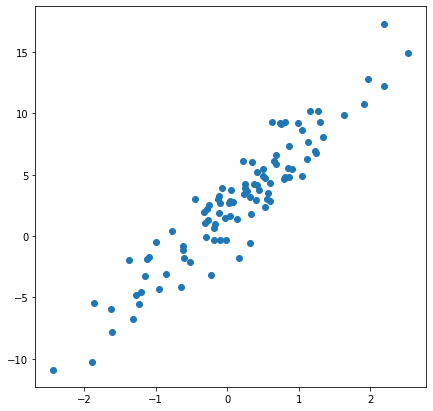

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,7)

# set seed
np.random.seed(1)

# hyperparameters
n = 100

# true parameters (we don't know this!)
mu, sigma = 0, 2
b0 = 2
b1 = 5

# generate data
e = np.random.normal(loc=mu, scale=sigma, size=n)
x = np.random.normal(loc=0, scale=1, size=n) # doesn't have to be normal, you can swap this for something else
y = b0 + b1*x + e

plt.scatter(x, y)
plt.show()

Suppose we believe that the data generating process is a linear. The plot appears to suggest this.

Our goal is to estimate the three parameters of a simple linear regression model: $\beta_0$, $\beta_1$, and $\sigma^2$.

At this point, we could theoretically derive the MLE for these parameters. To save time, let me just give them to you:

\begin{align*}
    \hat{\beta}_1 &= \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}\\
    \hat{\beta}_0 &= \bar{y} - \hat{\beta}_1\bar{x}\\
    \hat{\sigma}^2 &= \frac{1}{n}\sum(y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2
\end{align*}

Very cool.

Now, let's calculate our estimates.

In [2]:
x_bar = np.mean(x)
y_bar = np.mean(y)

beta1_hat = sum((x - x_bar)*(y - y_bar))/sum((x - x_bar)**2)
beta0_hat = y_bar - beta1_hat*x_bar
sigma2_hat = sum((y - (beta0_hat + beta1_hat*x))**2)/n

print('beta1_hat = ', beta1_hat)
print('beta0_hat = ', beta0_hat)
print('sigma_hat = ', np.sqrt(sigma2_hat))

beta1_hat =  5.172153051400498
beta0_hat =  2.0948616169460195
sigma_hat =  1.7630267304540486


We can verify that our implementation is correct by comparing our estimates to that of `sklearn`.

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x.reshape(-1, 1), y) # must reshape x before fitting
resid = y - model.predict(x.reshape(-1, 1)) # must compute residuals manually

print('beta1_hat = ', model.coef_[0])
print('beta0_hat = ', model.intercept_)
print('sigma_hat = ', np.std(resid))

beta1_hat =  5.172153051400494
beta0_hat =  2.0948616169460204
sigma_hat =  1.7630267304540481


Since we can generate new samples at will, we can improve our estimates by increasing the sample size to some arbitrarily large number.

Now let's try to estimate the sampling distribution of our estimates for some <b><u>fixed sample size</b></u>.

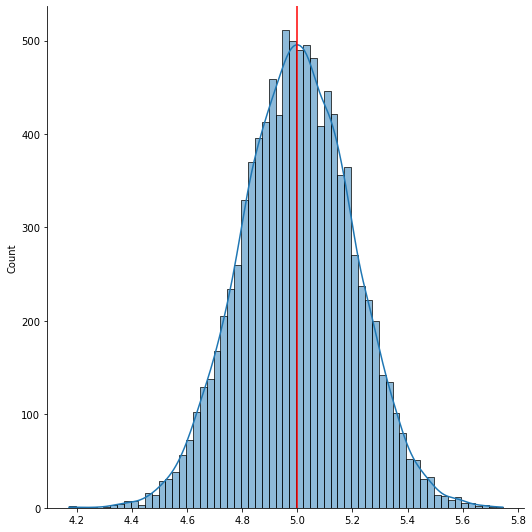

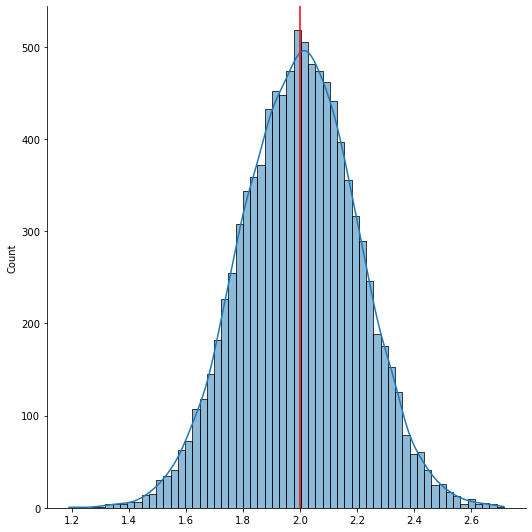

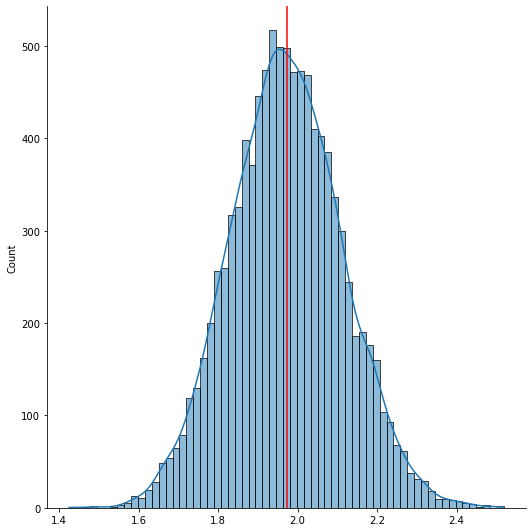

In [4]:
import seaborn as sns

# hyperparameter
sim_size = 10_000

# estimate sampling dist
# put my estimates here
beta1_hat_vec = []
beta0_hat_vec = []
sigma2_hat_vec = []

for i in range(sim_size):
    
    # generate new data
    e = np.random.normal(mu, sigma, n)
    x = np.random.normal(0, 1, n)
    y = b0 + b1*x + e
    
    # estimate
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    beta1_hat = sum((x - x_bar)*(y - y_bar))/sum((x - x_bar)**2)
    beta0_hat = y_bar - beta1_hat*x_bar
    sigma2_hat = sum((y - (beta0_hat + beta1_hat*x))**2)/n
    
    beta1_hat_vec.append(beta1_hat)
    beta0_hat_vec.append(beta0_hat)
    sigma2_hat_vec.append(sigma2_hat)
    
sns.displot(beta1_hat_vec, kde=True, height=7.5, aspect=1)
plt.axvline(np.mean(beta1_hat_vec), c = 'red')
plt.show()

sns.displot(beta0_hat_vec, kde=True, height=7.5, aspect=1)
plt.axvline(np.mean(beta0_hat_vec), c = 'red')
plt.show()

sns.displot(np.sqrt(sigma2_hat_vec), kde=True, height=7.5, aspect=1)
plt.axvline(np.mean(np.sqrt(sigma2_hat_vec)), c = 'red')
plt.show()

In [5]:
# stats on sampling dist
print('Mean of beta1_hat =', np.mean(beta1_hat_vec))
print('  SE of beta1_hat =', np.std(beta1_hat_vec))

# 95% conf int estimate
print('\n95% confidence intervals:')
b1_conf_int = np.nanquantile(beta1_hat_vec, [0.025, 0.975])
print(' beta1_hat =', b1_conf_int)

b0_conf_int = np.nanquantile(beta0_hat_vec, [0.025, 0.975])
print(' beta0_hat =', b0_conf_int)

sigma2_conf_int = np.nanquantile(sigma2_hat_vec, [0.025, 0.975])
print('sigma2_hat =', sigma2_conf_int)

Mean of beta1_hat = 4.999892543184925
  SE of beta1_hat = 0.20047471532575556

95% confidence intervals:
 beta1_hat = [4.60845496 5.38624879]
 beta0_hat = [1.6071851  2.39101628]
sigma2_hat = [2.89934201 5.07372438]


We can also use the `statsmodels` package to calculate the confidence intervals and other statistics of interest automatically.

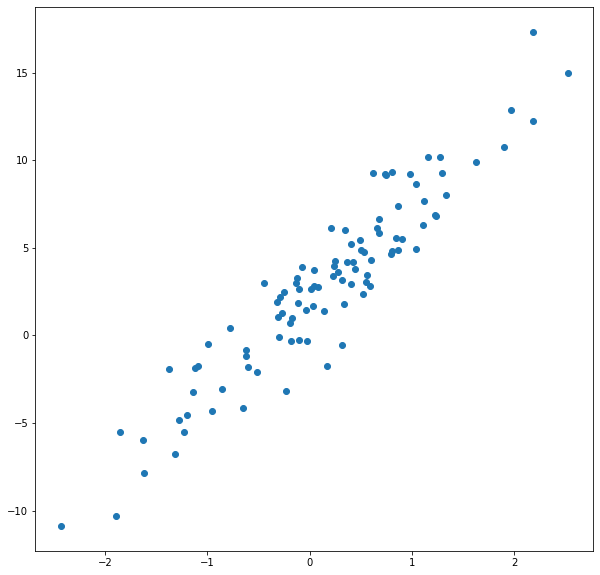

[-0.44712856  1.2245077   0.40349164  0.59357852 -1.09491185]
[[ 1.         -0.44712856]
 [ 1.          1.2245077 ]
 [ 1.          0.40349164]
 [ 1.          0.59357852]
 [ 1.         -1.09491185]]


In [6]:
import statsmodels.api as sm

# set seed
np.random.seed(1)

# observed data
e = np.random.normal(mu, sigma, n)
x = np.random.normal(0, 1, n)
y = b0 + b1*x + e

# plot
plt.scatter(x, y)
plt.show()

# add constant, this will make the model also fit an intercept
print(x[:5])
x = sm.add_constant(x)
print(x[:5])

In [7]:
# fit linear regression model via ordinary least squares estimation (same as MLE if errors are normal)
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())
print()
print('           beta = ', results.params)
print('standard errors =', results.bse)
print('      sigma_hat =', np.std(results.resid))

# extract other stats
print('\ncovariance matrix =\n', results.cov_params())
print('\n95% conf int =\n', results.conf_int())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     732.6
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           2.83e-47
Time:                        02:40:14   Log-Likelihood:                -198.60
No. Observations:                 100   AIC:                             401.2
Df Residuals:                      98   BIC:                             406.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0949      0.180     11.608      0.0